In [ ]:
import pandas as pd
from google.colab import drive
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.signal import find_peaks
drive.mount('/content/drive')


Mounted at /content/drive


#debut + ML


In [ ]:
def replace_second_one(column):
    indexes = np.nonzero(column.values)[0]
    for i in range(1, len(indexes)):
        if indexes[i] - indexes[i-1] < 15:
            column.at[indexes[i]] = 0
    return column

In [ ]:
def tracer_courbes_index(dataframe, colonnes, index_min=None, index_max=None):
    if index_min is not None and index_max is not None:
        dataframe_filtre = dataframe.loc[index_min:index_max]
        print(dataframe['Mx'].loc[index_min:index_max].describe())

    else:
        dataframe_filtre = dataframe

    plt.figure(figsize=(10, 6))  # Définir la taille de la figure
    for colonne in colonnes:
        plt.plot(dataframe_filtre.index, dataframe_filtre[colonne], label=colonne)  # Tracer la courbe

    plt.xlabel('Index des lignes')  # Libellé de l'axe des abscisses
    plt.ylabel('Valeur')  # Libellé de l'axe des ordonnées
    plt.legend()  # Afficher la légende
    plt.grid(True)  # Afficher la grille
    plt.show()  # Afficher le graphique




In [ ]:
def normalize(columns_to_normalize, dataframe):

  scaler = MinMaxScaler()
  dataframe[columns_to_normalize] = scaler.fit_transform(dataframe[columns_to_normalize])
  return dataframe





In [ ]:
def replace_outliers_with_mean(column):

    upper = column.quantile(0.99)
    outliers = column[(column > upper)]
    column[outliers.index] = column.mean()

    return column



In [ ]:
def coup(path,s):

  cd_df = pd.read_csv(path, skiprows=3)
  cd_df.reset_index(drop=True, inplace=True)
  cut = cd_df['Strike'].fillna('0').replace('Strike', '1').replace(r'(?<=1)1', 0, regex=True).astype(int)
  number_of_cd = cut.sum()
  print(s+" shape=",cd_df.shape)
  print("Nombre de: "+ s, number_of_cd)
  value_counts = cut.value_counts()

  frequency_1 = value_counts[1] / value_counts[0]

  print(round(frequency_1*100,2),'% of 1 compare to 0')
  cd_df = cd_df.apply(pd.to_numeric, errors='coerce')

  cd_df = cd_df.astype(float)
  #cd_df['MNorm'] = cd_df['MNorm'].replace(cd_df['MNorm'].max(),cd_df['MNorm'].sum()/cd_df['MNorm'].shape[0])

  columns_to_normalize = ['ANorm', 'GNorm', 'MNorm']
  cd_df = normalize(columns_to_normalize,cd_df)
  return cd_df

def coup_with_outlier(path):

  cd_df = pd.read_csv(path, skiprows=3)
  cd_df.reset_index(drop=True, inplace=True)
  cut = cd_df['Strike'].fillna('0').replace('Strike', '1').astype(int)
  cut = replace_second_one(cut)
  number_of_cd = cut.sum()
  value_counts = cut.value_counts()
  frequency_1 = value_counts[1] / value_counts[0]
  cd_df = cd_df.apply(pd.to_numeric, errors='coerce')

  cd_df = cd_df.astype(float)
  replace_outliers_with_mean

  columns_to_normalize = ['ANorm', 'GNorm', 'MNorm',"Mx","My","Mz","Gx","Gy","Gz"]
  columns_to_change = ['ANorm', 'GNorm', 'MNorm']

  for col in columns_to_normalize:
      cd_df[col]  = replace_outliers_with_mean(cd_df[col])

  cd_df = normalize(columns_to_normalize,cd_df)
  return cd_df


In [ ]:
cd1_csv = '/content/drive/MyDrive/IOT/cd1.csv'
cd_df = coup_with_outlier(cd1_csv,"Coup droit")
cd2_csv = '/content/drive/MyDrive/IOT/cd2.csv'
cd_df2 = coup_with_outlier(cd2_csv,"Coup droit")
cdplayer2_csv = '/content/drive/MyDrive/IOT/cdplayer2.csv'
cd_df3 = coup_with_outlier(cdplayer2_csv,"Coup droit")


Coup droit shape= (277, 14)
Nombre de: Coup droit 4
1.47 % of 1 compare to 0
Coup droit shape= (461, 14)
Nombre de: Coup droit 9
1.99 % of 1 compare to 0
Coup droit shape= (293, 14)
Nombre de: Coup droit 6
2.09 % of 1 compare to 0


In [ ]:
rv1_csv = '/content/drive/MyDrive/IOT/rv1.csv'
rv_df = coup_with_outlier(rv1_csv, 'revers')

rv2_csv = '/content/drive/MyDrive/IOT/rv2.csv'
rv_df2 = coup_with_outlier(rv2_csv, 'revers')

rv3_csv = '/content/drive/MyDrive/IOT/rv3.csv'
rv_df3 = coup_with_outlier(rv3_csv, 'revers')

rv4_csv = '/content/drive/MyDrive/IOT/rv4.csv'
rv_df4 = coup_with_outlier(rv4_csv, 'revers')


revers shape= (319, 14)
Nombre de: revers 4
1.27 % of 1 compare to 0
revers shape= (267, 14)
Nombre de: revers 2
0.75 % of 1 compare to 0
revers shape= (467, 14)
Nombre de: revers 11
2.41 % of 1 compare to 0
revers shape= (1122, 14)
Nombre de: revers 22
2.0 % of 1 compare to 0


In [ ]:
alt_csv = '/content/drive/MyDrive/IOT/alternance1.csv'
alt_df = coup_with_outlier(alt_csv, 'Alterance')

alt_csv2 = '/content/drive/MyDrive/IOT/alternance2.csv'
alt_df2 = coup_with_outlier(alt_csv2, 'Alterance')

alt_csv3 = '/content/drive/MyDrive/IOT/alternance3.csv'
alt_df3 = coup_with_outlier(alt_csv3, 'Alterance')

alt_csv4 = '/content/drive/MyDrive/IOT/alternance4.csv'
alt_df4 = coup_with_outlier(alt_csv4, 'Alterance')

alt_csv5 = '/content/drive/MyDrive/IOT/alternance5.csv'
alt_df5 = coup_with_outlier(alt_csv5, 'Alterance')



Alterance shape= (2594, 14)
Nombre de: Alterance 47
1.85 % of 1 compare to 0
Alterance shape= (494, 14)
Nombre de: Alterance 6
1.23 % of 1 compare to 0
Alterance shape= (296, 14)
Nombre de: Alterance 3
1.02 % of 1 compare to 0
Alterance shape= (249, 14)
Nombre de: Alterance 4
1.63 % of 1 compare to 0
Alterance shape= (544, 14)
Nombre de: Alterance 9
1.68 % of 1 compare to 0


In [ ]:
cdcsv1 = '/content/drive/MyDrive/IOT/IOT2/coupdroit1.csv'
cd1 = coup_with_outlier(cdcsv1, 'Alterance')

cdcsv2 = '/content/drive/MyDrive/IOT/IOT2/coupdroit2.csv'
cd2 = coup_with_outlier(cdcsv2, 'Alterance')

cdcsv3 = '/content/drive/MyDrive/IOT/IOT2/coupdroit3.csv'
cd3 = coup_with_outlier(cdcsv3, 'Alterance')

rvcsv1 = '/content/drive/MyDrive/IOT/IOT2/revers1.csv'
rv1 = coup_with_outlier(rvcsv1, 'Alterance')

rvcsv2 = '/content/drive/MyDrive/IOT/IOT2/revers2.csv'
rv2 = coup_with_outlier(rvcsv2, 'Alterance')

altcsv1 = '/content/drive/MyDrive/IOT/IOT2/alt1.csv'
alt1 = coup_with_outlier(altcsv1, 'Alterance')

altcsv2 = '/content/drive/MyDrive/IOT/IOT2/alt22.csv'
alt2 = coup_with_outlier(altcsv2, 'Alterance')

Alterance shape= (627, 14)
Nombre de: Alterance 28
4.67 % of 1 compare to 0
Alterance shape= (642, 14)
Nombre de: Alterance 26
4.22 % of 1 compare to 0
Alterance shape= (578, 14)
Nombre de: Alterance 25
4.52 % of 1 compare to 0
Alterance shape= (689, 14)
Nombre de: Alterance 30
4.55 % of 1 compare to 0
Alterance shape= (687, 14)
Nombre de: Alterance 33
5.05 % of 1 compare to 0
Alterance shape= (659, 14)
Nombre de: Alterance 33
5.27 % of 1 compare to 0
Alterance shape= (453, 14)
Nombre de: Alterance 19
4.38 % of 1 compare to 0


In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
allfile=[cd_df,cd_df2,cd_df3,cd1,cd2,cd3,rv1,rv2,rv_df,rv_df2,rv_df3,rv_df4,]
#[alt_df,alt_df2,alt_df3,alt_df4,alt_df5]

In [2]:
import pandas as pd

# Créer un DataFrame simple
data = {'Valeurs': [10, 15, 12, 8, 20,23,23,24,23]}
df = pd.DataFrame(data)

# Calculer la différence entre les valeurs successives
diff = df['Valeurs'].diff()

# Afficher le résultat
print(diff)

0     NaN
1     5.0
2    -3.0
3    -4.0
4    12.0
5     3.0
6     0.0
7     1.0
8    -1.0
Name: Valeurs, dtype: float64


In [ ]:
dataset =[]
for i,file in enumerate(allfile):

  peaks, _ = find_peaks(file['ANorm'].values, distance=25, height=0.94)
  coltoplot = ['Mz']
  middle = []
  for j in range(0, len(peaks)):
    l = list(file['Mx'][peaks[j]-6:peaks[j]].values)
    #print(l)
    l.extend(list(file['My'][peaks[j]-6:peaks[j]].values))
    l.extend(list(file['Mz'][peaks[j]-6:peaks[j]].values))
    l.extend(list(file['Gx'][peaks[j]-6:peaks[j]].values))
    l.extend(list(file['Gy'][peaks[j]-6:peaks[j]].values))
    l.extend(list(file['Gz'][peaks[j]-6:peaks[j]].values))

    if i in [0,1,2,3,4,5]:
      l.append(0)
    else:
      l.append(1)
    dataset.append(l)
  print(l)


column_names = [i for i in range(36)]
column_names.append('label')
array = np.stack(dataset)
# Convert to Pandas DataFrame
df = pd.DataFrame(array,columns=column_names)
nombre_nan = df.isna().sum().sum()
print("nombredena:",print)
df =df.dropna()
df

[0.7295231766074098, 0.7567702276125602, 0.9380295730187738, 0.7416514371158, 0.2764578833693304, 0.47283601927230434, 0.6419287756693528, 0.6564855731739018, 0.7242006758513128, 0.7413569014816741, 0.8210293735378217, 0.6579152586430985, 0.6419287756693528, 0.6564855731739018, 0.7242006758513128, 0.7413569014816741, 0.8210293735378217, 0.6579152586430985, 0.8507795100222717, 0.858203414996288, 0.504083147735709, 0.5018559762435041, 0.2635486265775798, 0.5909428359317, 0.9848619768477294, 0.9492430988423864, 0.7898486197684773, 1.0, 1.0, 0.5547640249332146, 0.29639125826477564, 0.31386715792661385, 0.34951799323676375, 0.30303210013627413, 0.0006990359864735007, 0.0, 0]
[0.8474985787379193, 0.812677657760091, 0.764781125639568, 0.9690164866401365, 0.9223990903922683, 0.7868106878908472, 0.7608751941998965, 0.6988606939409633, 0.6248058001035733, 0.7238477472812015, 0.7120662868979803, 0.7278612118073537, 0.7608751941998965, 0.6988606939409633, 0.6248058001035733, 0.7238477472812015, 0.

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,label
0,0.830703,0.830703,0.935039,0.981891,0.935039,0.777870,0.488043,0.488043,0.569015,0.644528,...,0.871327,0.874889,0.996438,0.213206,0.243614,0.348469,0.349518,0.349518,0.304081,0.0
1,0.963615,0.495690,0.962120,0.815750,0.542283,0.364014,0.509358,0.549129,0.677801,0.733429,...,1.000000,1.000000,0.581478,0.290449,0.281712,0.321906,0.294644,0.238721,0.000000,0.0
2,0.892673,0.995348,0.495690,0.945506,0.847317,0.794484,0.427086,0.562386,0.604757,0.564986,...,0.852627,0.914069,0.998664,0.263537,0.312469,0.339382,0.300585,0.227187,0.180701,0.0
3,0.729523,0.756770,0.938030,0.741651,0.276458,0.472836,0.641929,0.656486,0.724201,0.741357,...,1.000000,1.000000,0.554764,0.296391,0.313867,0.349518,0.303032,0.000699,0.000000,0.0
4,0.737635,0.736356,0.861711,0.897953,0.971575,0.074901,0.569394,0.524469,0.420119,0.461031,...,0.002454,0.002614,0.003423,0.001839,0.001895,0.002208,0.002428,0.003138,0.001369,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,0.803311,0.483577,0.805657,0.823514,0.831726,0.782065,0.117852,0.827091,0.148800,0.149922,...,0.000528,0.000921,0.000952,0.000639,0.000702,0.000917,0.001219,0.001325,0.001324,1.0
111,0.861444,0.874479,0.850756,0.789103,0.789103,0.708551,0.161359,0.167078,0.224266,0.282575,...,0.000904,0.000886,0.000767,0.001151,0.001261,0.001325,0.001267,0.001193,0.000957,1.0
112,0.927789,0.938478,0.944343,0.944343,0.955031,0.928962,0.794124,0.782687,0.764297,0.764297,...,0.000589,0.000593,0.000520,0.000733,0.000739,0.000786,0.000856,0.000965,0.001316,1.0
114,0.830553,0.849583,0.860271,0.861444,0.851929,0.816345,0.154519,0.154519,0.165956,0.184234,...,0.000844,0.000917,0.000958,0.001207,0.001216,0.001224,0.001248,0.001248,0.001207,1.0


In [ ]:
feature_cols =[i for i in range(36)]
X = df[feature_cols] # Features
y = df.label # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from pickle import dump
from pickle import load

Accuracy: 0.9285714285714286


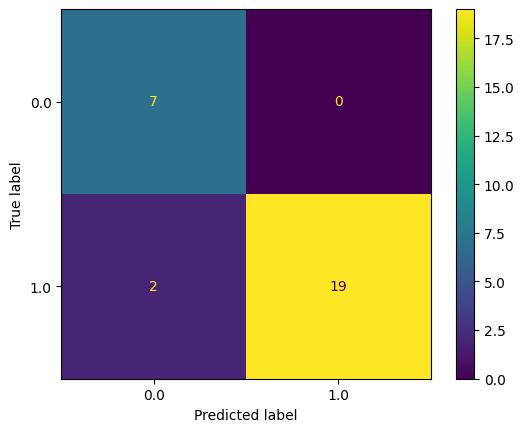

In [ ]:
clf = RandomForestClassifier()

# Train Decision Tree Classifer
rfc = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = rfc.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [ ]:
with open('/content/drive/MyDrive/model_tenis.pkl', 'wb') as file:
    dump(rfc, file)

In [ ]:



def coups(path):

  cd_df = pd.read_csv(path, skiprows=3)
  cd_df.reset_index(drop=True, inplace=True)
  cd_df = cd_df.apply(pd.to_numeric, errors='coerce')

  cd_df = cd_df.astype(float)
  replace_outliers_with_mean

  columns_to_normalize = ['ANorm', 'GNorm', 'MNorm',"Mx","My","Mz","Gx","Gy","Gz"]
  columns_to_change = ['ANorm', 'GNorm', 'MNorm']

  for col in columns_to_normalize:
      cd_df[col]  = replace_outliers_with_mean(cd_df[col])

  cd_df = normalize(columns_to_normalize,cd_df)
  return cd_df


In [ ]:
def predict_coupdroit(csv_path):
  model = load(open('/content/drive/MyDrive/model_tenis.pkl', 'rb'))
  cps = coups(csv_path)
  peaks, _ = find_peaks(cps['ANorm'].values, distance=25, height=0.94)
  coltoplot = ['Mz']
  middle = []
  l=[]
  data = []
  for j in range(0, len(peaks)):

    l= list(cps['Mx'][peaks[j]-6:peaks[j]].values)
    l.extend(list(cps['My'][peaks[j]-6:peaks[j]].values))
    l.extend(list(cps['Mz'][peaks[j]-6:peaks[j]].values))
    l.extend(list(cps['Gx'][peaks[j]-6:peaks[j]].values))
    l.extend(list(cps['Gy'][peaks[j]-6:peaks[j]].values))
    l.extend(list(cps['Gz'][peaks[j]-6:peaks[j]].values))

    data.append(l)
  column_names = [i for i in range(36)]
  array = np.stack(data)
  df = pd.DataFrame(array,columns=column_names)
  df =df.dropna()
  preds = model.predict(df)
  return preds


In [ ]:
list(predict_coupdroit('/content/drive/MyDrive/IOT/IOT2/alt22.csv'))

[0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0]

#Onsenfo

In [ ]:
all_mean=[]
all_median = []
for file in allfile:
  idx = 0
  diff = list(file['Strike'].values)
  moy = []
  for i in range(len(diff)):
    if diff[i] == 1:
      #print(i-idx)
      moy.append(i-idx)
      idx = i

  median_value = np.median(moy)
  moy = [i for i in moy if i < 2*median_value]
  median_value = np.median(moy)
  all_mean.append(sum(moy)/len(moy))
  all_median.append(median_value)


median_value = np.median(all_mean)
mean_value = np.mean(all_mean)
print("coup moyen=",mean_value)
print("coup median=",median_value)
#print(len([i for i in moy if i <6]))


coup moyen= 43.29770955165693
coup median= 35.91666666666667


In [ ]:
list(cd_df3['Strike'].values)

In [ ]:
idx = 0
diff = list(cd_df3['Strike'].values)
moy = []
for i in range(len(diff)):
  if diff[i] == 1:
    #print(i-idx)
    moy.append(i-idx)
    idx = i

median_value = np.median(moy)
moy = [i for i in moy if i < 2*median_value]
median_value = np.median(moy)
print(moy)
print(len(moy))
print(sum(moy)/len(moy))


print(median_value)
#print(len([i for i in moy if i <6]))

[32, 43, 44, 58, 38, 65]
6
46.666666666666664
43.5


#plus tard

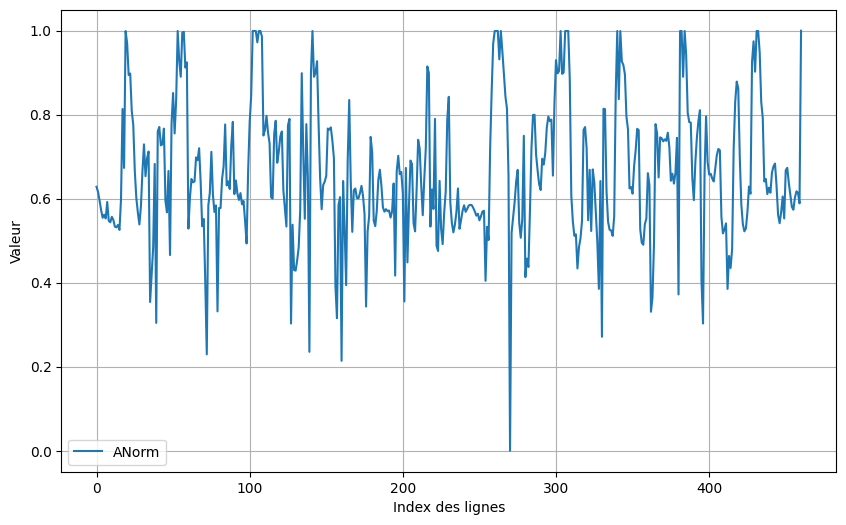

In [ ]:
coltoplot = [ 'ANorm']
tracer_courbes_index(cd_df, coltoplot, 0, 1000)

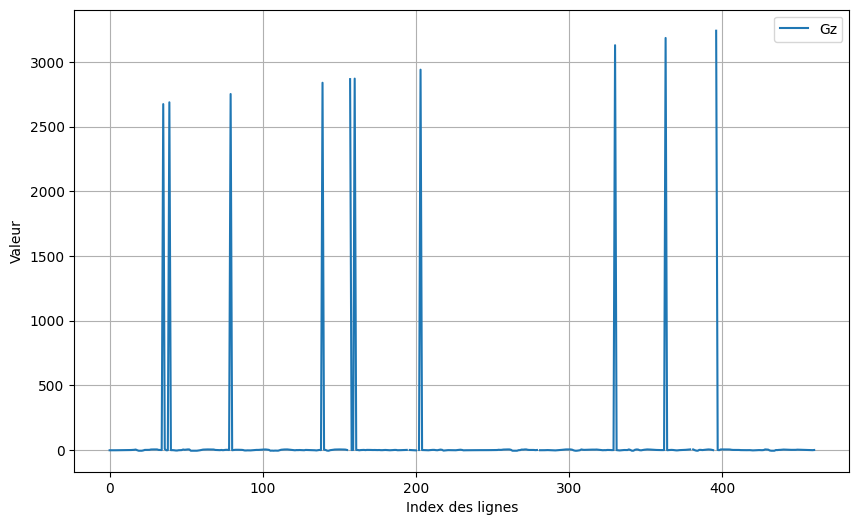

In [ ]:
coltoplot = ['Gz']
tracer_courbes_index(cd_df, coltoplot, 0, 1000)

#Anorm

##Coup droit

[37 48 59 38 46]


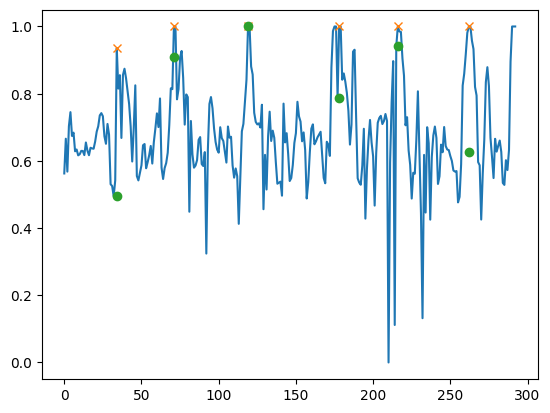

6


In [ ]:
peaks, _ = find_peaks(cd_df3['ANorm'].values, distance=30, height=0.82)
# difference between peaks is >= 150
print(np.diff(peaks))
# prints [186 180 177 171 177 169 167 164 158 162 172]

plt.plot(cd_df3['ANorm'].values)
plt.plot(peaks, cd_df3['ANorm'].values[peaks], "x")
indexes = np.nonzero(cd_df3['Strike'].values)[0]
plt.plot(peaks, cd_df3['ANorm'].values[indexes], "o")

plt.show()
print(len(peaks))

In [ ]:
import pandas as pd
import numpy as np

def get_indexes_of_ones(column):
    indexes = np.nonzero(column.values)[0]
    return indexes

# Exemple d'utilisation
df = pd.DataFrame({'Column': [0, 1, 1, 0, 1, 0, 0, 1, 1, 0]})
column = df['Column']

indexes_of_ones = get_indexes_of_ones(column)
print(indexes_of_ones)


[1 2 4 7 8]


##Revers

[ 47  95 126 216 259 291 317 346 372 406 432]


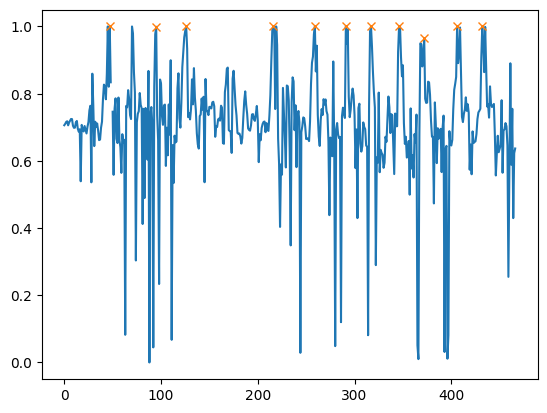

11


In [ ]:
peaks, _ = find_peaks(rv_df3['ANorm'].values, distance=25, height=0.94)
# difference between peaks is >= 150
print(peaks)
# prints [186 180 177 171 177 169 167 164 158 162 172]

plt.plot(rv_df3['ANorm'].values)
plt.plot(peaks, rv_df3['ANorm'].values[peaks], "x")
plt.show()
print(len(peaks))

##Alternance

[ 46  46  42 110  54  43  74  63]


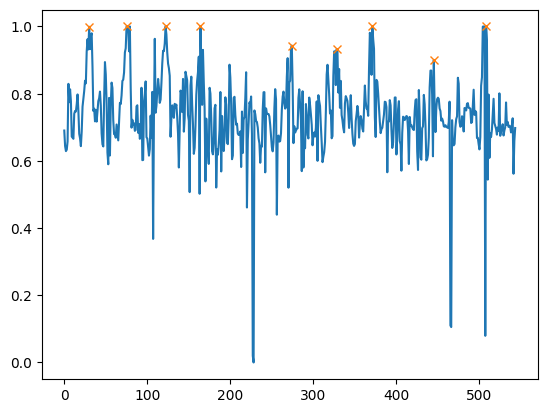

9


In [ ]:
peaks, _ = find_peaks(alt_df5['ANorm'], distance=34/2, height=0.90)
# difference between peaks is >= 150
print(np.diff(peaks))
# prints [186 180 177 171 177 169 167 164 158 162 172]

plt.plot(alt_df5['ANorm'])
plt.plot(peaks, alt_df5['ANorm'].values[peaks], "x")
plt.show()

print(len(peaks))

#Mnorm

##Coup droit

In [ ]:
statisticdroit = cd_df2['Mz'].describe()
statisticdroit

count    461.000000
mean       0.573744
std        0.229245
min        0.000000
25%        0.418781
50%        0.568532
75%        0.758955
max        1.000000
Name: Mz, dtype: float64

In [ ]:
statisticgauche = rv_df2['Mz'].describe()
statisticgauche

count    267.000000
mean       0.608988
std        0.224932
min        0.000000
25%        0.469180
50%        0.672335
75%        0.764851
max        1.000000
Name: Mz, dtype: float64

[52 33 57 53]
5


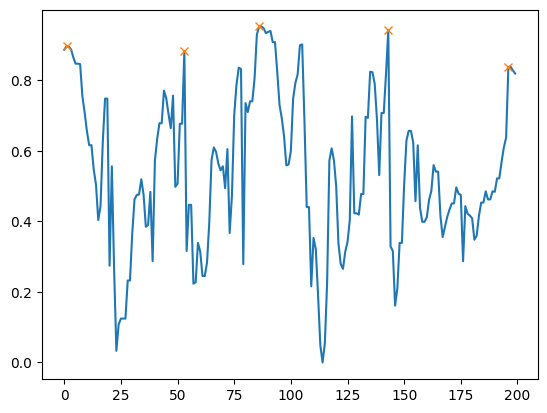

In [ ]:
peaks, _ = find_peaks(cd_df2['My'][0:200].values, distance=30, height=0.82)
# difference between peaks is >= 150
print(np.diff(peaks))

print(len(peaks))
plt.plot(cd_df2['My'][0:200].values)
plt.plot(peaks, cd_df2['My'].values[peaks], "x")
plt.show()

##Rever

[]
1


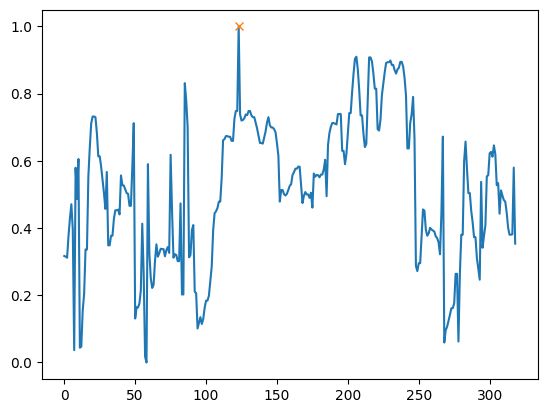

In [ ]:
peaks, _ = find_peaks(rv_df['My'][0:500].values, distance=25, height=0.94)
# difference between peaks is >= 150
print(np.diff(peaks))

print(len(peaks))
plt.plot(rv_df['My'][0:500].values)
plt.plot(peaks, rv_df['My'].values[peaks], "x")
plt.show()

##Alternance

[ 23  34  38  38  64  29  51 144]


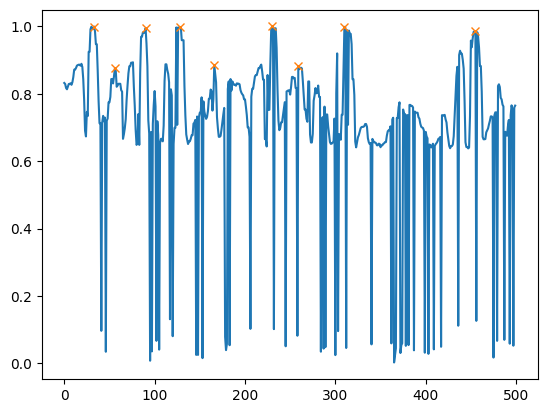

9


In [ ]:
peaks, _ = find_peaks(alt_df['MNorm'][0:500], distance=20, height=0.84)
# difference between peaks is >= 150
print(np.diff(peaks))
# prints [186 180 177 171 177 169 167 164 158 162 172]

plt.plot(alt_df['MNorm'][0:500])
plt.plot(peaks, alt_df['MNorm'].values[peaks], "x")
plt.show()
print(len(peaks))

#Gnorm

##Coup droit

[ 56  10 117  74  84]
6


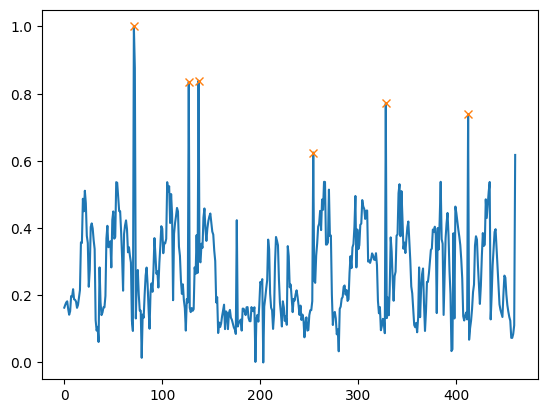

In [ ]:
peaks, _ = find_peaks(cd_df['GNorm'].values, distance=9, height=0.5)
# difference between peaks is >= 150
print(np.diff(peaks))

print(len(peaks))
plt.plot(cd_df['GNorm'].values)
plt.plot(peaks, cd_df['GNorm'].values[peaks], "x")
plt.show()


##Revers

[179]
2


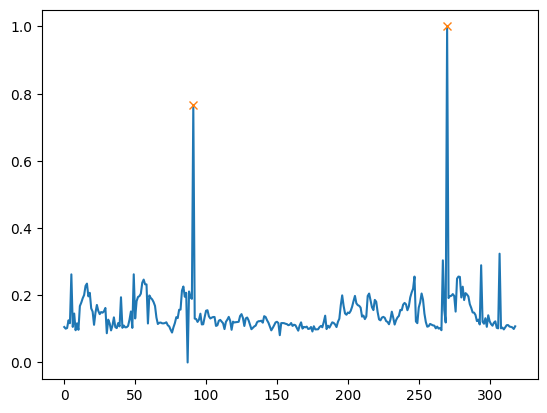

In [ ]:
peaks, _ = find_peaks(rv_df['GNorm'].values, distance=9, height=0.35)
# difference between peaks is >= 150
print(np.diff(peaks))

print(len(peaks))
plt.plot(rv_df['GNorm'].values)
plt.plot(peaks, rv_df['GNorm'].values[peaks], "x")
plt.show()

#Par coup

##Coup droit

prediction= 6
count    7.000000
mean     0.812665
std      0.107531
min      0.702874
25%      0.722088
50%      0.767474
75%      0.911195
max      0.951740
Name: Mx, dtype: float64


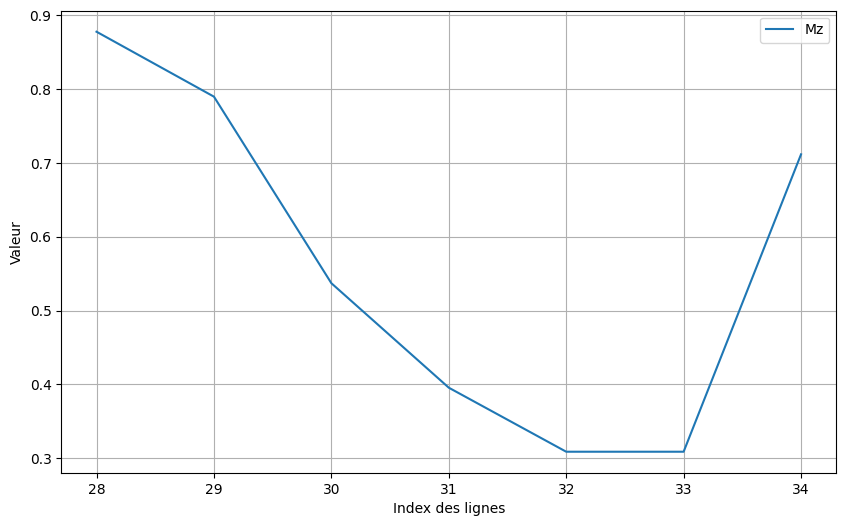

count    7.000000
mean     0.867128
std      0.145392
min      0.676702
25%      0.731770
50%      0.971104
75%      0.979274
max      1.000000
Name: Mx, dtype: float64


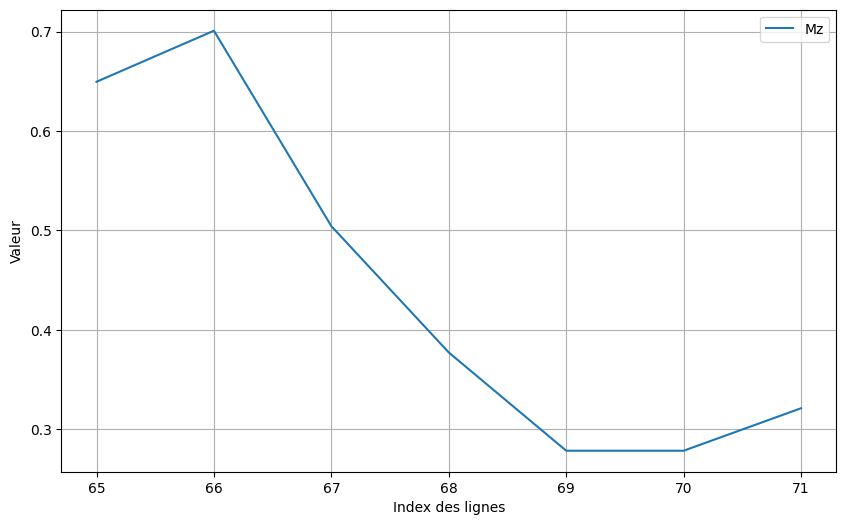

count    7.000000
mean     0.732505
std      0.208060
min      0.430560
25%      0.623071
50%      0.814221
75%      0.872012
max      0.892587
Name: Mx, dtype: float64


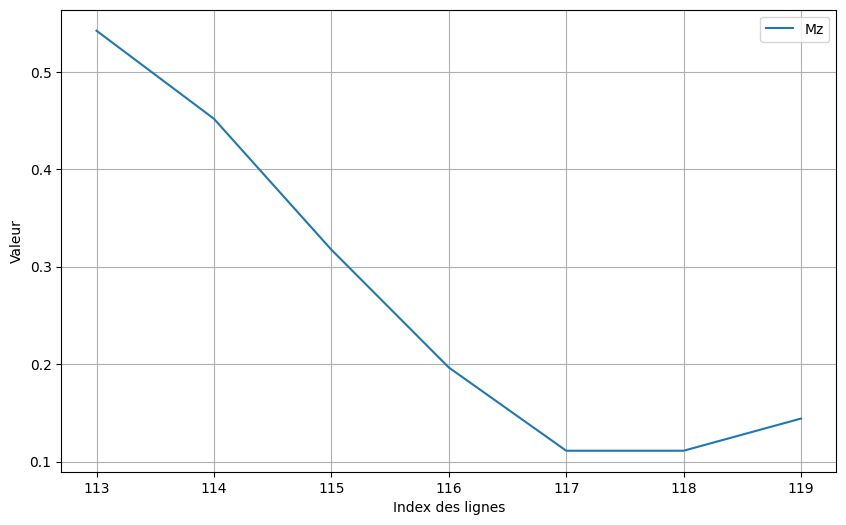

count    7.000000
mean     0.613508
std      0.261171
min      0.129349
25%      0.532375
50%      0.668533
75%      0.781997
max      0.867927
Name: Mx, dtype: float64


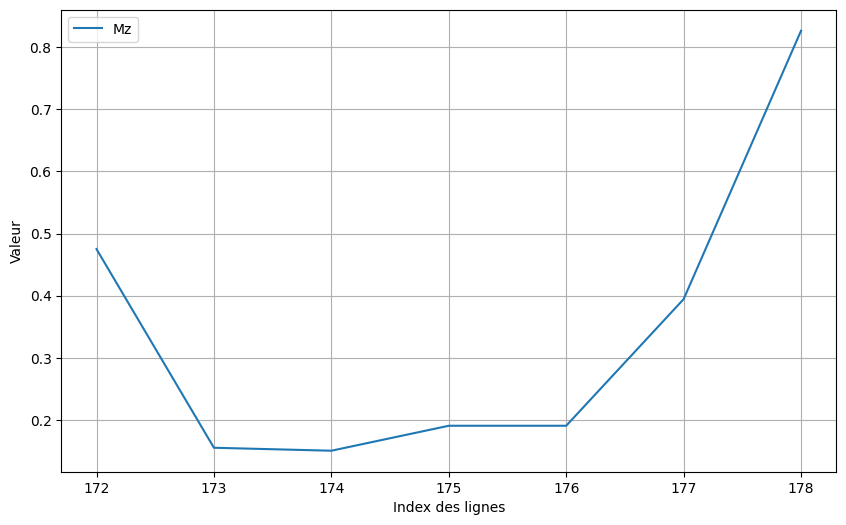

count    7.000000
mean     0.698509
std      0.211575
min      0.415431
25%      0.564523
50%      0.706959
75%      0.832829
max      0.972466
Name: Mx, dtype: float64


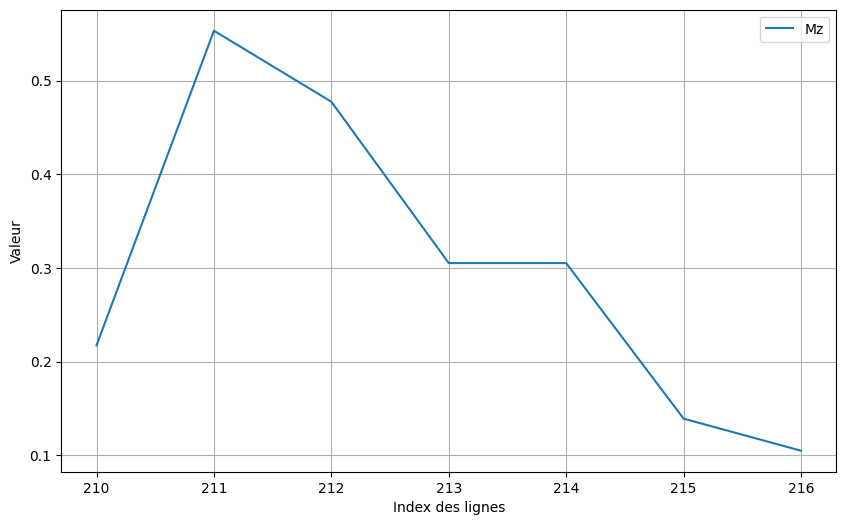

count    7.000000
mean     0.638794
std      0.114659
min      0.482753
25%      0.540620
50%      0.691831
75%      0.737897
max      0.739939
Name: Mx, dtype: float64


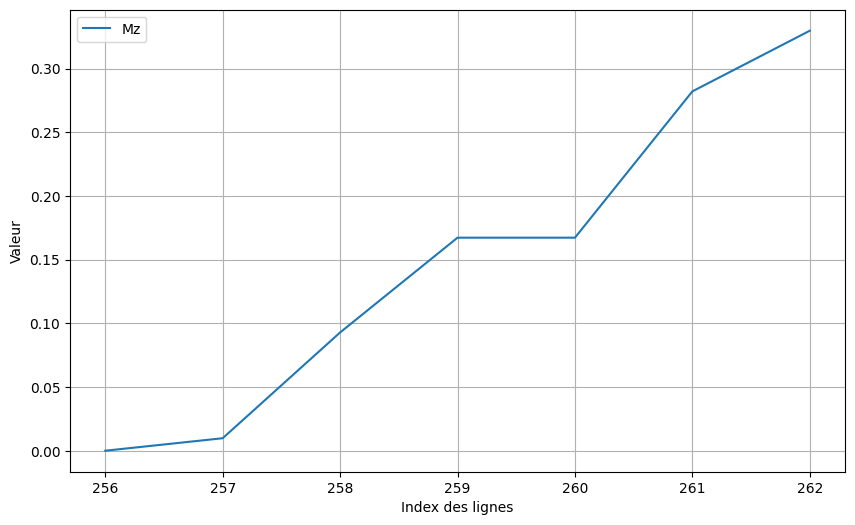

In [ ]:
peaks, _ = find_peaks(cd_df3['ANorm'].values, distance=30, height=0.82)
print("prediction=",len(peaks))
middle = []
for i in range(0, len(peaks)):
  middle.append((peaks[i]-6,peaks[i]))
  #middle.append(int((peaks[i-1]+peaks[i])/2))
coltoplot = ['Mz']
for i in range(0, len(middle)):
    """if i == 0:
      tracer_courbes_index(cd_df2, coltoplot, midle, middle[0])
    else:"""
    tracer_courbes_index(cd_df3, coltoplot, middle[i][0], middle[i][1])


#tracer_courbes_index(cd_df, coltoplot, middle[-1], n)


##Revers

[ 47  95 126 216 259 291 317 346 372 406 432]
prediction= 11
count    6.000000
mean     0.769815
std      0.120497
min      0.580833
25%      0.702708
50%      0.798056
75%      0.870590
max      0.876250
Name: Mx, dtype: float64


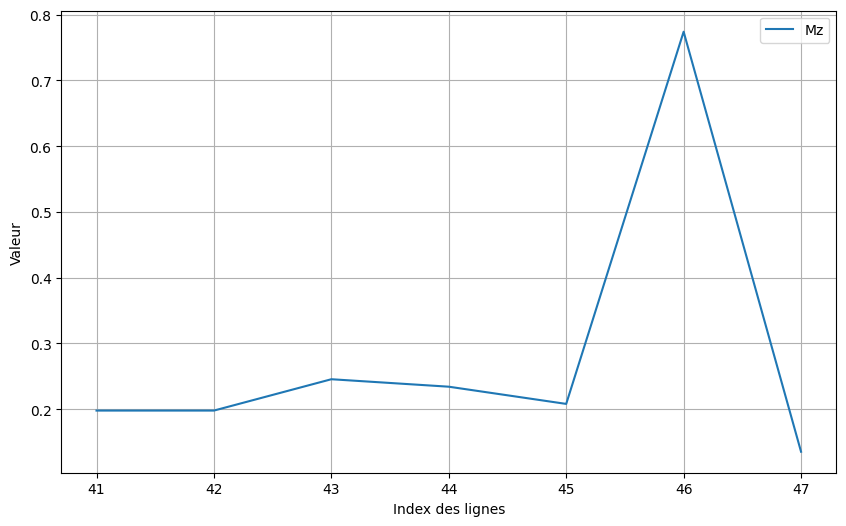

count    7.000000
mean     0.550853
std      0.191079
min      0.257639
25%      0.418403
50%      0.635139
75%      0.675556
max      0.775278
Name: Mx, dtype: float64


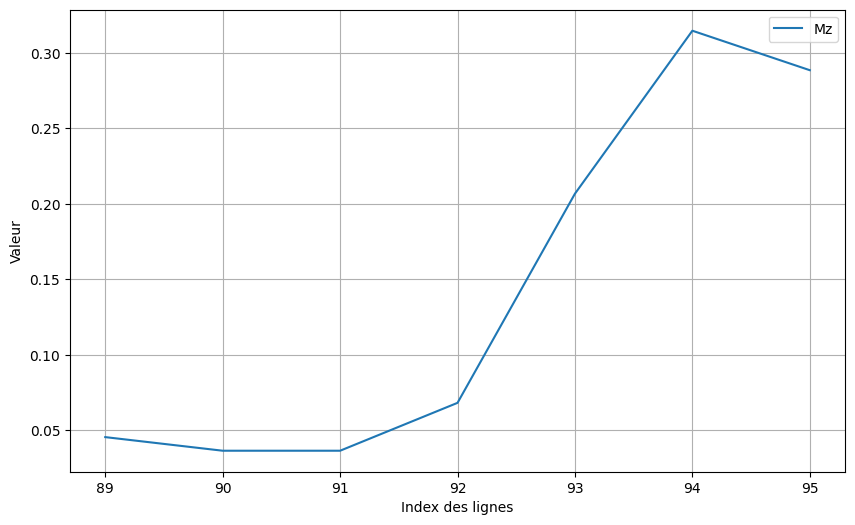

count    7.000000
mean     0.680933
std      0.193977
min      0.363611
25%      0.600417
50%      0.760139
75%      0.798611
max      0.844722
Name: Mx, dtype: float64


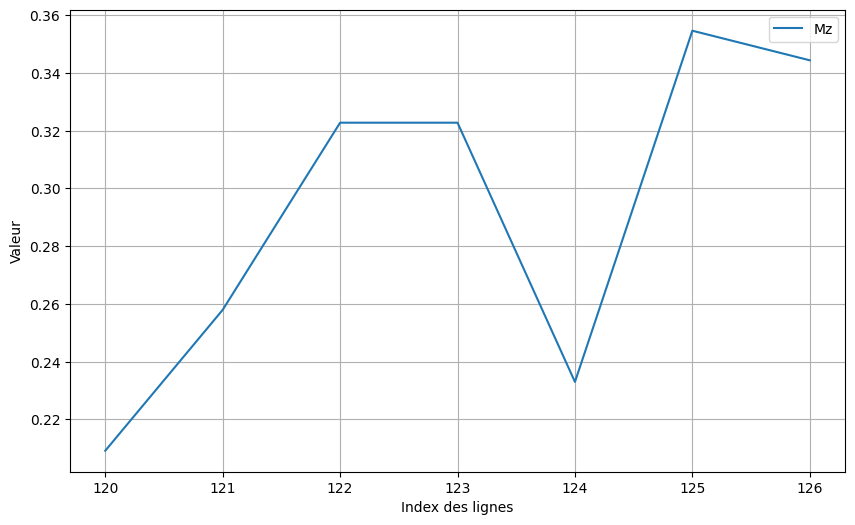

count    7.000000
mean     0.925853
std      0.054715
min      0.820694
25%      0.907847
50%      0.933056
75%      0.968403
max      0.974722
Name: Mx, dtype: float64


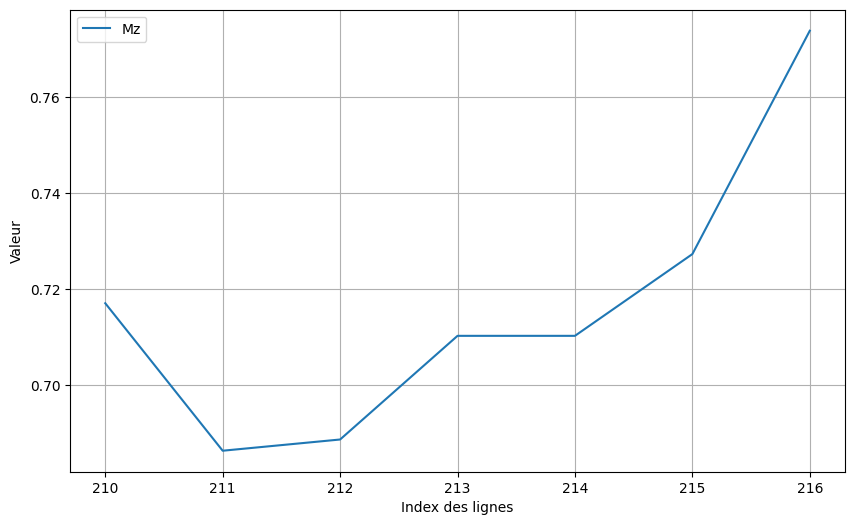

count    7.000000
mean     0.812619
std      0.085412
min      0.685556
25%      0.748125
50%      0.843472
75%      0.883264
max      0.896528
Name: Mx, dtype: float64


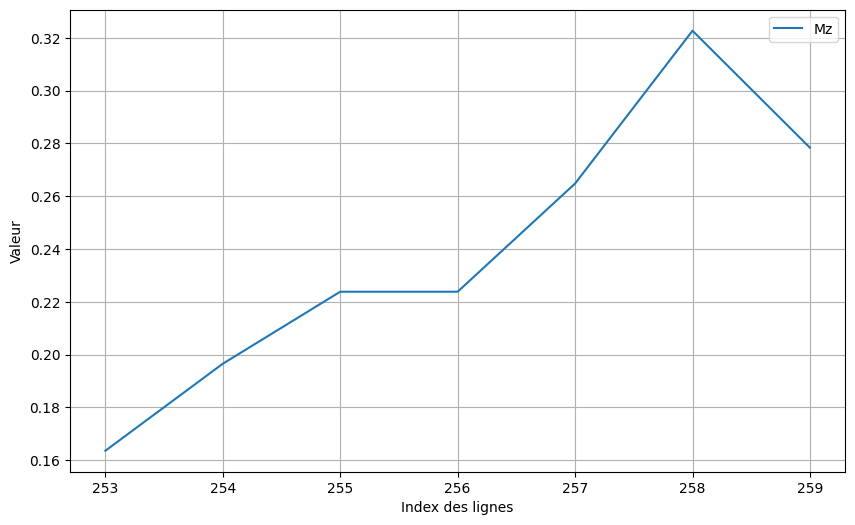

count    7.000000
mean     0.752917
std      0.149458
min      0.502778
25%      0.692569
50%      0.838333
75%      0.847222
max      0.849722
Name: Mx, dtype: float64


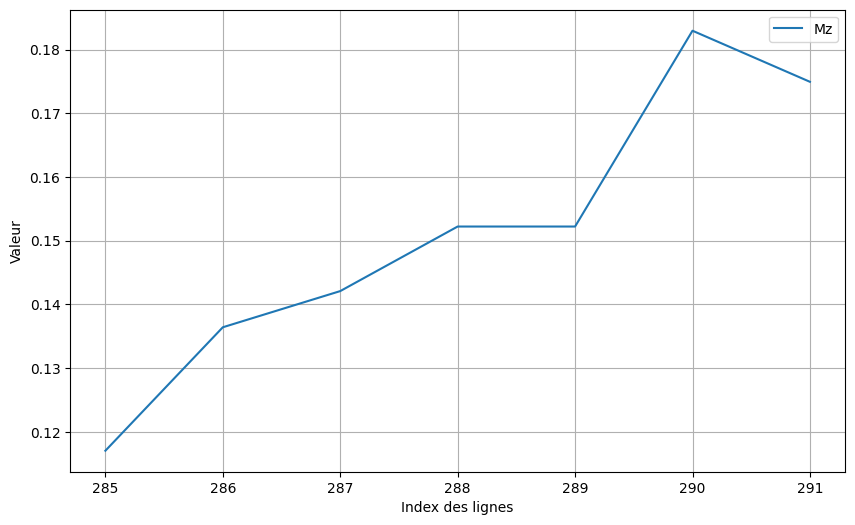

count    7.000000
mean     0.720079
std      0.113923
min      0.520278
25%      0.671111
50%      0.755000
75%      0.786042
max      0.850972
Name: Mx, dtype: float64


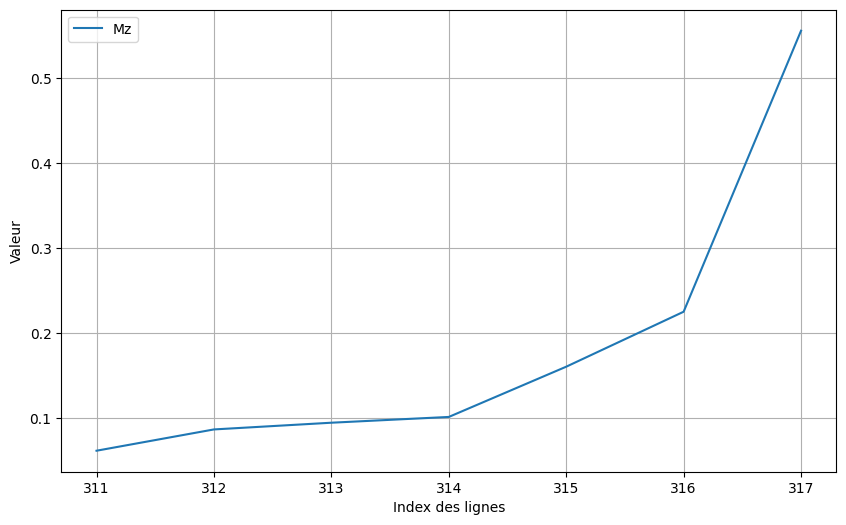

count    7.000000
mean     0.731541
std      0.253612
min      0.380833
25%      0.563728
50%      0.645278
75%      0.984861
max      0.997500
Name: Mx, dtype: float64


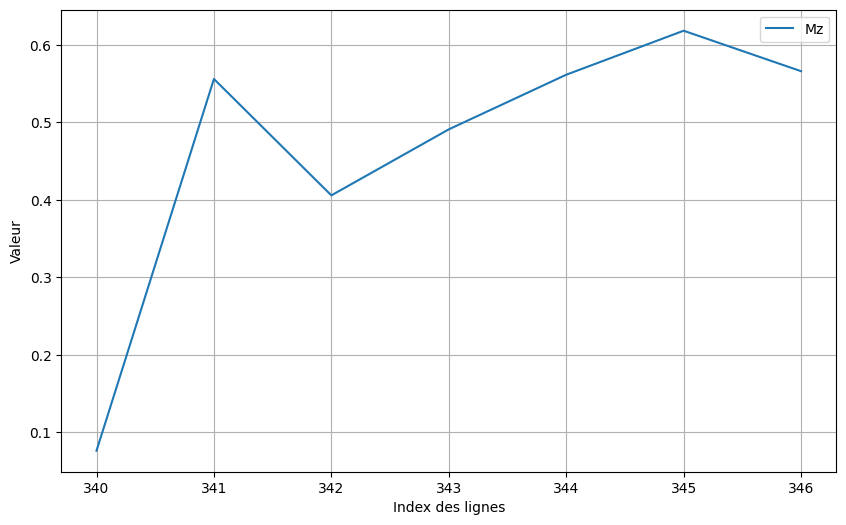

count    7.000000
mean     0.732619
std      0.160912
min      0.456528
25%      0.688125
50%      0.745000
75%      0.776528
max      0.997500
Name: Mx, dtype: float64


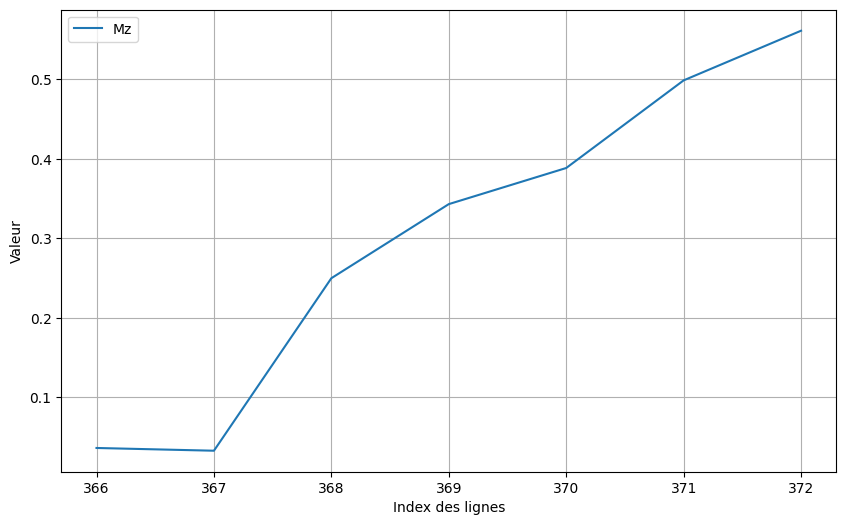

count    7.000000
mean     0.814226
std      0.080866
min      0.642639
25%      0.806875
50%      0.838333
75%      0.862431
max      0.880000
Name: Mx, dtype: float64


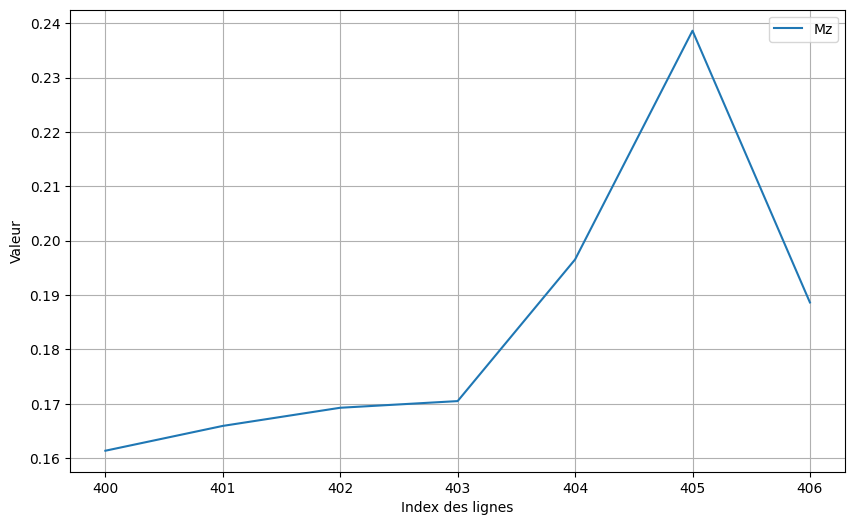

count    7.000000
mean     0.821627
std      0.090347
min      0.690694
25%      0.774653
50%      0.858611
75%      0.880069
max      0.892639
Name: Mx, dtype: float64


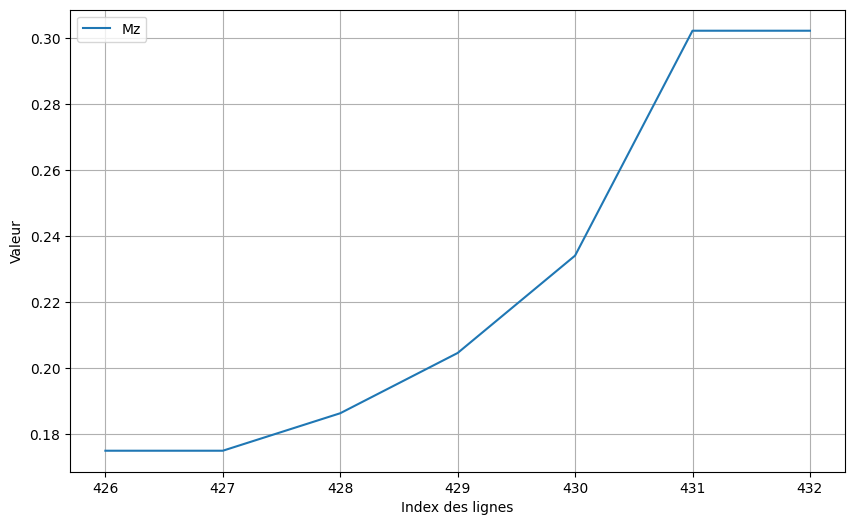

In [ ]:
peaks, _ = find_peaks(rv_df3['ANorm'].values, distance=25, height=0.94)
print(peaks)
print("prediction=",len(peaks))

coltoplot = ['Mz']
middle = []
for i in range(0, len(peaks)):
  middle.append((peaks[i]-6,peaks[i]))

for i in range(0, len(middle)):
      tracer_courbes_index(rv_df3, coltoplot, middle[i][0], middle[i][1])




Coup droit Slice

In [ ]:
coltoplot = ['GNorm']
for i in range(1, len(middle)):
    tracer_courbes_index(dataframe, coltoplot, middle[i-1], middle[i])


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def tracer_graphique_3D(dataframe, colonne_x, colonne_y, colonne_z):
    # Extraire les données des colonnes x, y et z
    x = dataframe[colonne_x]
    y = dataframe[colonne_y]
    z = dataframe[colonne_z]

    # Créer une figure 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Tracer le graphique 3D
    ax.scatter(x, y, z)

    # Ajouter des labels aux axes
    ax.set_xlabel(colonne_x)
    ax.set_ylabel(colonne_y)
    ax.set_zlabel(colonne_z)

    # Afficher le graphique
    plt.show()

# Exemple d'utilisation


In [ ]:
def plot_3d_en_direct(dataframe, colonne_x, colonne_y, colonne_z):
    # Créer une figure 3D
    fig = plt.figure()
    #ax = fig.add_subplot(111, projection='3d')

    # Définir les propriétés des axes
    """ax.set_xlabel(colonne_x)
    ax.set_ylabel(colonne_y)
    ax.set_zlabel(colonne_z)"""

    # Traiter les points un par un
    for index, row in dataframe.iterrows():
        x = row[colonne_x]
        y = row[colonne_y]
        z = row[colonne_z]

        # Tracer le point en 3D
        plt.scatter(x, y, z)
        plt.draw()
        plt.pause(0.001)  # Délai entre chaque point (en secondes)

    # Désactiver le mode interactif à la fin
    plt.ioff()
    # Afficher le graphique
    plt.show()


In [ ]:
plot_3d_en_direct(dataframe, 'Ax', 'Ay', 'Az')


In [ ]:
import numpy as np

def find_outliers(data):
    # Calculer les quartiles Q1 et Q3
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)

    # Calculer l'écart interquartile (IQR)
    IQR = Q3 - Q1

    # Calculer les limites supérieure et inférieure pour détecter les outliers
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Trouver les outliers dans la liste de données
    outliers = [x for x in data if x < lower_limit or x > upper_limit]

    return outliers

# Exemple d'utilisation
outliers = find_outliers(moy)

print("Outliers:", outliers)
